### ASSIGNMENT-4

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [35]:
equity = "HDFCBANK.NS"  
start_date = "2013-07-07"
end_date = "2023-07-07"
equity_data = yf.download(equity, start=start_date, end=end_date, progress=False)

In [36]:
equity_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2013-07-08 to 2023-07-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2465 non-null   float64
 1   High       2465 non-null   float64
 2   Low        2465 non-null   float64
 3   Close      2465 non-null   float64
 4   Adj Close  2465 non-null   float64
 5   Volume     2465 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.8 KB


In [37]:
equity_data.head(15)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-07-08,332.000000,333.725006,326.375000,330.225006,307.046478,3584648
2013-07-09,331.100006,336.875000,331.100006,335.149994,311.625732,3520096
2013-07-10,335.125000,335.950012,328.075012,329.649994,306.511841,3569290
2013-07-11,333.500000,343.350006,333.024994,341.625000,317.646240,5299784
2013-07-12,343.500000,348.850006,340.899994,347.875000,323.457581,7817426
2013-07-15,345.500000,349.024994,342.000000,347.725006,323.318176,4255944
2013-07-16,339.500000,342.250000,334.975006,339.350006,315.530975,5823692
2013-07-17,338.899994,340.399994,323.950012,331.450012,308.185486,11316994
2013-07-18,334.950012,344.250000,328.475006,342.049988,318.041473,6831940


In [38]:
equity_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2465.000000,2465.000000,2465.000000,2465.000000,2465.000000,2.465000e+03
mean,959.346572,968.116987,949.897050,959.186380,928.824742,6.529909e+06
std,422.931146,426.689493,419.014248,422.813592,422.752425,6.787120e+06
min,277.850006,286.000000,264.000000,280.950012,261.230072,0.000000e+00
25%,539.250000,543.500000,534.250000,539.900024,508.992798,2.814082e+06
50%,975.000000,983.349976,964.400024,974.250000,938.393738,4.794650e+06
75%,1360.000000,1372.650024,1345.000000,1356.250000,1335.222168,7.906608e+06
max,1723.449951,1757.500000,1713.800049,1728.199951,1728.199951,2.011300e+08


###  KELTNER CHANNEL: 





In [39]:
def calculate_keltner_channel_bands(data, ema_period=20, atr_period=10, multiplier=2):
    
    
    
    # Exponential Moving Average (EMA)
    ema = data['Close'].ewm(span=ema_period, adjust=False).mean()

    #Average True Range (ATR)
    high_low = data['High'] - data['Low']
    high_close = np.abs(data['High'] - data['Close'].shift())
    low_close = np.abs(data['Low'] - data['Close'].shift())
    true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
    atr = true_range.rolling(atr_period).mean()

    #Keltner Channel
    upper_band = ema + (multiplier * atr)
    lower_band = ema - (multiplier * atr)

    return ema, upper_band, lower_band


In [40]:
#Keltner Channel 
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

KeyError: '0'

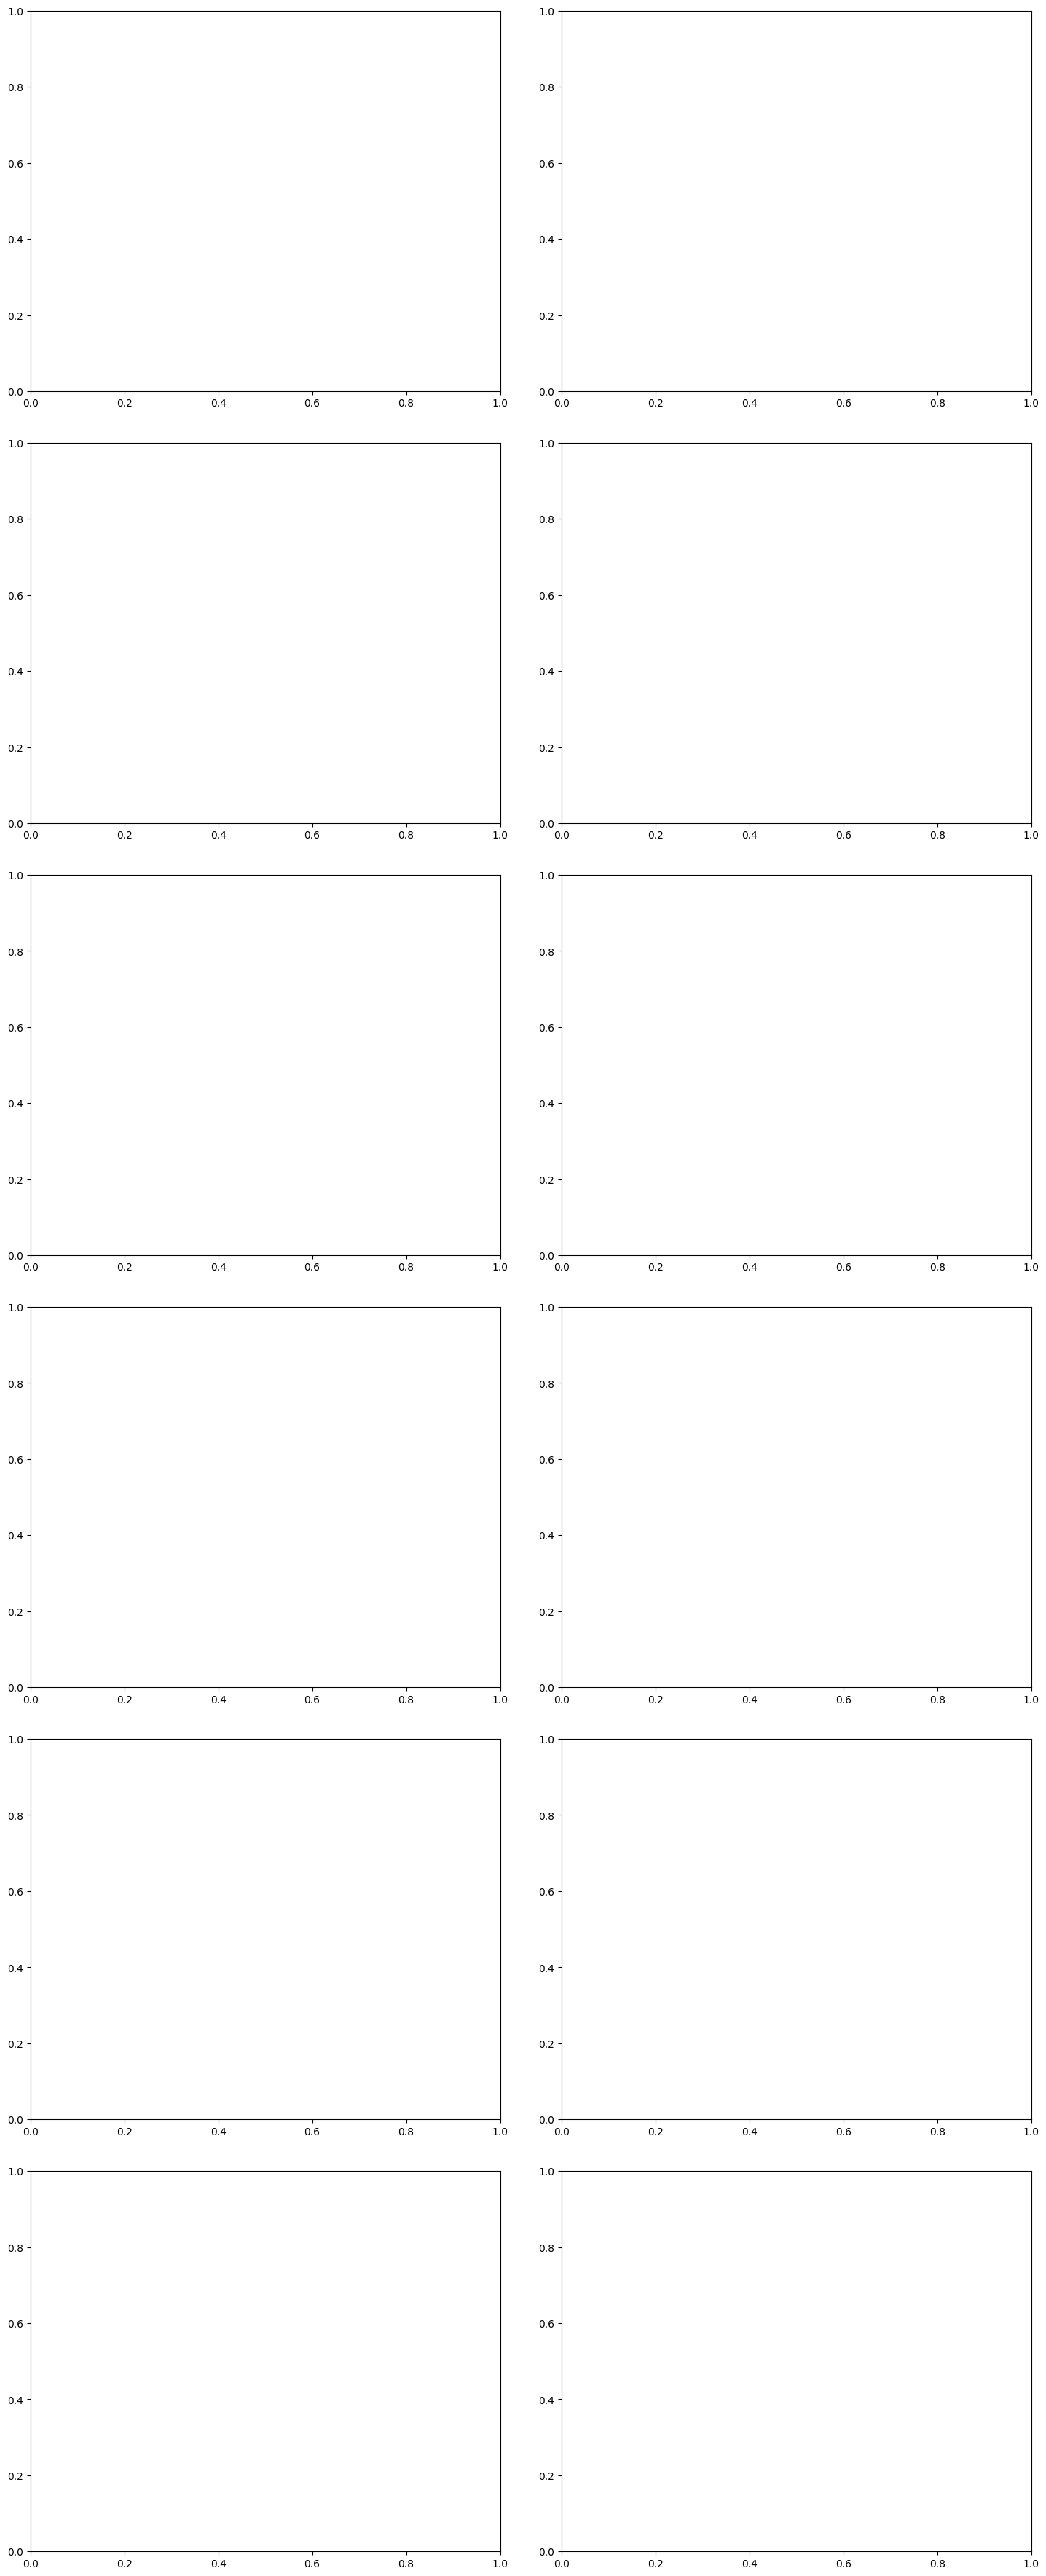

In [41]:
start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
fig.tight_layout(pad=3.0)

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = equity_data[str(i)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

    #  subplot position
    row = i // num_cols
    col = i % num_cols

    axs[row, col].plot(year_data.index, year_data['Close'], label='Close Price')
    axs[row, col].plot(year_data.index, ema, label='EMA')
    axs[row, col].plot(year_data.index, upper_band, label='Upper Band')
    axs[row, col].plot(year_data.index, lower_band, label='Lower Band')
    axs[row, col].set_title('Keltner Channel ({0})'.format(year))
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.show()

The graph graph can be explained as when the closing price consistently reaches or exceeds the upper band, it may suggest an overbought condition, indicating a potential reversal or correction. Conversely, when the closing price consistently falls below the lower band, it may indicate an oversold condition, signaling a potential bounce or upward move.

KeyError: '2013'

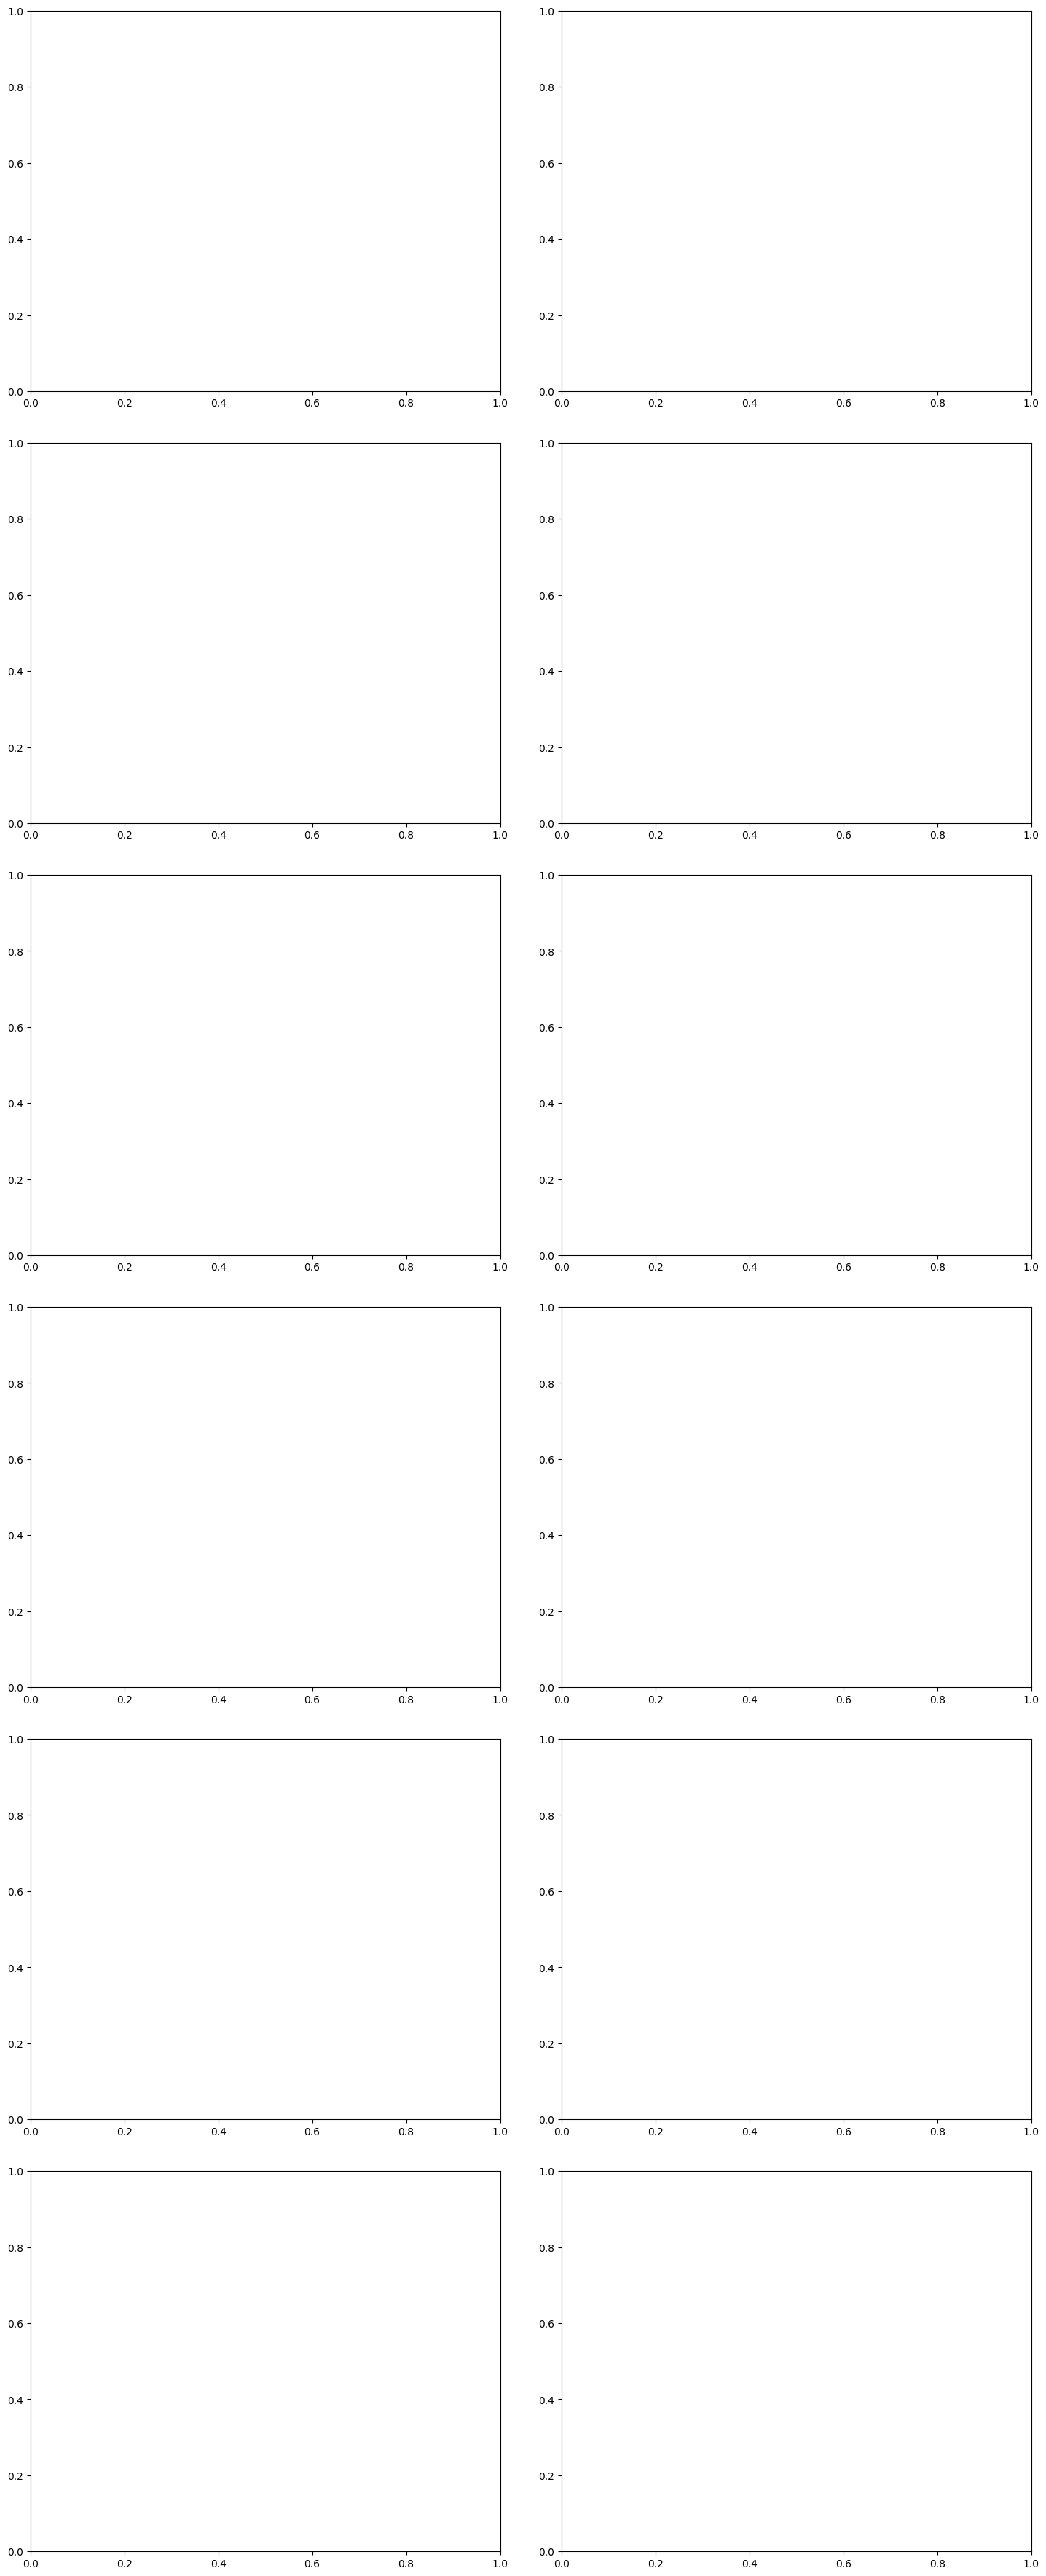

In [ ]:
start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

# Calculate the number of rows and columns 
num_rows = (total_years + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))
fig.tight_layout(pad=3.0)

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)


    sell_signals = year_data[year_data['Close'] > upper_band]['Close']
    buy_signals = year_data[year_data['Close'] < lower_band]['Close']

    row = i // num_cols
    col = i % num_cols

 
    axs[row, col].plot(year_data.index, year_data['Close'], label='Close Price')
    axs[row, col].plot(year_data.index, ema, label='EMA')
    axs[row, col].plot(year_data.index, upper_band, label='Upper Band')
    axs[row, col].plot(year_data.index, lower_band, label='Lower Band')
    axs[row, col].scatter(sell_signals.index, sell_signals, color='red', label='Sell Signal', marker='o')
    axs[row, col].scatter(buy_signals.index, buy_signals, color='green', label='Buy Signal', marker='o')
    axs[row, col].set_title('Keltner Channel ({0})'.format(year))
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()
    axs[row, col].grid(True)

plt.show()

### Trading Strategy:
* If the price is below the lower line of the Keltner Channel, it indicates a potential buying opportunity.
* If the price is above the upper line of the Keltner Channel, it suggests a potential selling opportunity.

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [ ]:
start_year = start_date.year
end_year = end_date.year
total_years = end_year - start_year + 1

# Calculate the number of rows and columns for the subplot grid
num_rows = (total_years + 1) // 2
num_cols = 2

for i, year in enumerate(range(start_year, end_year + 1)):
    year_data = equity_data[str(year)]

    # Preparing data for candlestick plot
    candlestick = go.Candlestick(
        x=year_data.index,
        open=year_data['Open'],
        high=year_data['High'],
        low=year_data['Low'],
        close=year_data['Close']
    )

    # Calculate subplot position
    row = i // num_cols
    col = i % num_cols

    # Plotting
    layout = go.Layout(
        title='Candlestick Chart ({0})'.format(year),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price'),
        showlegend=False
    )
    fig = go.Figure(data=[candlestick], layout=layout)
    fig.update_layout(height=400, width=1500)  # Set the desired chart size
    fig.show()

In [ ]:
for year in range(start_date.year, end_date.year + 1):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

    # Here we are preparing data for candlestick plot
    candlestick = go.Candlestick(
        x=year_data.index,
        open=year_data['Open'],
        high=year_data['High'],
        low=year_data['Low'],
        close=year_data['Close']
    )

    #Here we are plotting
    fig = go.Figure()

    # Here we are adding candlestick trace
    fig.add_trace(candlestick)

    # Here we are adding Keltner Channel lines
    fig.add_trace(go.Scatter(
        x=year_data.index, y=ema,
        mode='lines',
        name='EMA',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=upper_band,
        mode='lines',
        name='Upper Band',
        line=dict(color='orange')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=lower_band,
        mode='lines',
        name='Lower Band',
        line=dict(color='orange')
    ))

    # Here we are setting layout
    fig.update_layout(
        title='Keltner Channel and Candlestick Chart ({0})'.format(year),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price')
    )

    # Show the combined plot
    fig.show()

In [ ]:
start_date = pd.to_datetime("2013-07-05")
end_date = pd.to_datetime("2023-07-05")

for year in range(start_date.year, end_date.year + 1):
    year_data = equity_data[str(year)]
    ema, upper_band, lower_band = calculate_keltner_channel_bands(year_data)

   
    candlestick = go.Candlestick(
        x=year_data.index,
        open=year_data['Open'],
        high=year_data['High'],
        low=year_data['Low'],
        close=year_data['Close']
    )

    # plotting
    fig = go.Figure()

    #  adding candlestick trace
    fig.add_trace(candlestick)

    #  adding Keltner Channel lines
    fig.add_trace(go.Scatter(
        x=year_data.index, y=ema,
        mode='lines',
        name='EMA',
        line=dict(color='blue')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=upper_band,
        mode='lines',
        name='Upper Band',
        line=dict(color='orange')
    ))
    fig.add_trace(go.Scatter(
        x=year_data.index, y=lower_band,
        mode='lines',
        name='Lower Band',
        line=dict(color='orange')
    ))

    # finding hammer candlestick pattern
    hammer_pattern = year_data[(year_data['Low'] - year_data['Open']) > 2 * (year_data['Close'] - year_data['Open'])]

    # generating buy and sell signals
    buy_signals = hammer_pattern['High'] + 0.01
    sell_signals = hammer_pattern['Low'] - 0.01

    #  plotting buy signals
    fig.add_trace(go.Scatter(
        x=hammer_pattern.index,
        y=buy_signals,
        mode='markers',
        marker=dict(symbol="cross", color="green"),
        name='Buy Signals'
    ))

    #  plotting sell signals
    fig.add_trace(go.Scatter(
        x=hammer_pattern.index,
        y=sell_signals,
        mode='markers',
        marker=dict(symbol="cross", color="red"),
        name='Sell Signals'
    ))

    #  setting layout
    fig.update_layout(
        title='Keltner Channel and Candlestick Chart ({0})'.format(year),
        xaxis=dict(title='Date'),
        yaxis=dict(title='Price'),
        showlegend=True
    )

    fig.show()

### Finding relevant statistics for the strategy: 

In [ ]:
cumulative_returns = []
max_drawdowns = []
sharpe_ratios = []

In [ ]:
#Returns, Drawdown, and Sharpe Ratio
returns = (hammer_pattern['Close'].pct_change() + 1).cumprod()
cumulative_returns.append(returns[-1] - 1)

# Drawdown
equity_curve = returns.cumprod()
previous_peaks = equity_curve.cummax()
drawdowns = (equity_curve - previous_peaks) / previous_peaks
max_drawdowns.append(drawdowns.max())

# Sharpe Ratio
daily_returns = hammer_pattern['Close'].pct_change()
sharpe_ratio = (daily_returns.mean() / daily_returns.std()) * np.sqrt(252)
sharpe_ratios.append(sharpe_ratio)

In [ ]:
mean_cumulative_returns = np.mean(cumulative_returns)
mean_max_drawdowns = np.mean(max_drawdowns)
mean_sharpe_ratios = np.mean(sharpe_ratios)

In [ ]:
print("Mean Cumulative Returns: ", mean_cumulative_returns)
print("Mean Maximum Drawdowns: ", mean_max_drawdowns)
print("Mean Sharpe Ratios: ", mean_sharpe_ratios)

Mean Cumulative Returns:  0.03928449307898063
Mean Maximum Drawdowns:  0.0
Mean Sharpe Ratios:  0.9990693535502156
